##### QPainter 繪圖 ( 儲存圖片 )
這篇教學會使用 PyQt5 的 QPainter() 搭配 QPixmap()，讓 QPainter() 所繪製的圖片可以儲存到電腦中。

##### 使用 QPainter() 搭配 QPixmap() 
在「QPainter 繪圖」的教學範例中，是利用 QPainter() 物件在主視窗的背景繪圖，但許多實際的狀況並不會在主視窗的背景繪圖，\
而是會使用 QPixmap() 物件作為「畫布」，在畫布進行作畫，下方的程式碼執行後，會產生一個 QPixmap() 物件，在這個物件上作畫之後，\
再透過 QLabel() 呈現出繪圖的內容。

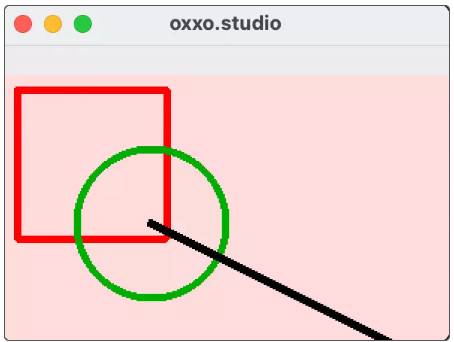

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 200)

label = QtWidgets.QLabel(MainWindow)   # 建立 QLabel
label.setGeometry(0, 20, 300, 180)     # 設定位置 ( 最上方留下 20px 空間 )

def draw(self):
    canvas = QPixmap(300,180)          # 新增 QPixmap 物件為畫布
    canvas.fill(QColor('#ffdddd'))     # 設定畫布背景
    qpainter = QPainter()              # 建立 QPainter() 物件
    qpainter.begin(canvas)             # 綁定 canvas 進行繪畫

    qpainter.setPen(QPen(QColor('#ff0000'), 5))  # 繪製紅色矩形
    qpainter.drawRect(10,10,100,100)

    qpainter.setPen(QPen(QColor('#00aa00'), 5))  # 繪製綠色橢圓
    qpainter.drawEllipse(50, 50, 100, 100)

    qpainter.setPen(QPen(QColor('#000000'), 5))  # 繪製黑色直線
    qpainter.drawLine(100,100,300,200)

    qpainter.end()                      # 繪圖結束
    label.setPixmap(canvas)             # 將 canvas 放入 QLabel 中

MainWindow.paintEvent = draw
MainWindow.show()
sys.exit(app.exec_())

##### QPixmap() 儲存圖片 
當作為畫布的 QPixmap() 物件已經繪製完成後，就能透過 save() 方法，將繪製的內容儲存成圖片，save() 的用法如下：

In [ ]:
canvas = QPixmap(width, height)
canvas.save(name, fomat, quality)

修改前一段的程式碼，加入按鈕的功能，就能在點擊按鈕的當下，將 QPixmap() 物件儲存成指定格式的圖片。

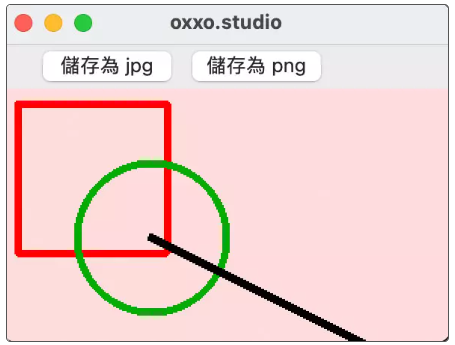

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 200)

label = QtWidgets.QLabel(MainWindow)
label.setGeometry(0, 30, 300, 170)

def save(format):
    if format == 'jpg':
        label.pixmap().save('demo.jpg','JPG',90)   # 儲存為 jpg
    else:
        label.pixmap().save('demo.png','PNG')      # 儲存為 png

btn1 = QtWidgets.QPushButton(MainWindow)
btn1.setText('儲存為 jpg')
btn1.setGeometry(20,0,100,30)
btn1.clicked.connect(lambda: save('jpg'))   # 綁定儲存的函式

btn2 = QtWidgets.QPushButton(MainWindow)
btn2.setText('儲存為 png')
btn2.setGeometry(120,0,100,30)
btn2.clicked.connect(lambda: save('png'))   # 綁定儲存的函式

def draw(self):
    canvas = QPixmap(300,170)
    canvas.fill(QColor('#ffdddd'))
    qpainter = QPainter()
    qpainter.begin(canvas)

    qpainter.setPen(QPen(QColor('#ff0000'), 5))
    qpainter.drawRect(10,10,100,100)

    qpainter.setPen(QPen(QColor('#00aa00'), 5))
    qpainter.drawEllipse(50, 50, 100, 100)

    qpainter.setPen(QPen(QColor('#000000'), 5))
    qpainter.drawLine(100,100,300,200)

    qpainter.end()
    label.setPixmap(canvas)

MainWindow.paintEvent = draw
MainWindow.show()
sys.exit(app.exec_())

##### 改成 class 的寫法

In [ ]:
# 導入 PyQt5 中的模組，用於構建圖形用戶界面和繪圖。
from PyQt5 import QtWidgets
from PyQt5.QtGui import *  # 導入所有 QtGui 模組中的類。
import sys  # 標準 Python 模組，用於處理各種系統相關的功能。

# 定義一個 MyWidget 類，繼承自 QtWidgets.QWidget，這是所有窗口元件的基類。
class MyWidget(QtWidgets.QWidget):
    # 類的初始化方法，這是類實例化時自動執行的方法。
    def __init__(self):
        super().__init__()  # 調用父類的建構函式。
        self.setWindowTitle('oxxo.studio')  # 設定窗口標題。
        self.resize(300, 200)  # 設定窗口大小。
        self.ui()  # 呼叫自定義的 ui 方法來建立用戶界面。

    # 定義一個建立用戶界面的方法。
    def ui(self):
        # 創建一個 QLabel 物件來顯示繪圖區域。
        self.label = QtWidgets.QLabel(self)
        self.label.setGeometry(0, 30, 300, 170)  # 設定標籤的幾何位置和大小。

        # 創建一個 QPushButton 物件，設定其文字並綁定點擊事件。
        self.btn1 = QtWidgets.QPushButton(self)
        self.btn1.setText('儲存為 jpg')
        self.btn1.setGeometry(20, 0, 100, 30)
        self.btn1.clicked.connect(lambda: self.save('jpg'))  # 點擊時執行儲存為 JPG。

        # 創建另一個 QPushButton 物件，設定其文字並綁定點擊事件。
        self.btn2 = QtWidgets.QPushButton(self)
        self.btn2.setText('儲存為 png')
        self.btn2.setGeometry(120, 0, 100, 30)
        self.btn2.clicked.connect(lambda: self.save('png'))  # 點擊時執行儲存為 PNG。

    # 定義一個方法用於儲存繪製的圖形為圖片文件。
    def save(self, format):
        if format == 'jpg':
            self.label.pixmap().save('demo.jpg', 'JPG', 90)  # 儲存為 JPG 格式。
        else:
            self.label.pixmap().save('demo.png', 'PNG')      # 儲存為 PNG 格式。

    # 定義 paintEvent 方法，這是 PyQt 框架中用於處理繪圖事件的方法。
    def paintEvent(self, event):
        canvas = QPixmap(300, 170)  # 創建一個 QPixmap 物件作為繪圖的畫布。
        canvas.fill(QColor('#ffdddd'))  # 設定畫布背景色。
        
        qpainter = QPainter()  # 創建一個 QPainter 物件進行繪圖。
        qpainter.begin(canvas)  # 開始在畫布上繪圖。

        # 設定畫筆顏色和樣式，然後繪製一個矩形。
        qpainter.setPen(QPen(QColor('#ff0000'), 5))
        qpainter.drawRect(10, 10, 100, 100)

        # 更改畫筆設定，繪製一個橢圓形。
        qpainter.setPen(QPen(QColor('#00aa00'), 5))
        qpainter.drawEllipse(50, 50, 100, 100)

        # 再次更改畫筆設定，繪製一條線。
        qpainter.setPen(QPen(QColor('#000000'), 5))
        qpainter.drawLine(100, 100, 300, 200)

        qpainter.end()  # 結束繪圖。
        self.label.setPixmap(canvas)  # 將繪製好的畫布設置到標籤上。

# 應用程序的主入口點。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 創建應用程序實例。
    Form = MyWidget()  # 創建窗口實例。
    Form.show()  # 顯示窗口。
    sys.exit(app.exec_())  # 啟動應用程序的事件循環，等待用戶操作。